# Data preprocessing

## emotion label + path to file

In [1]:
#!/home/judehey/miniconda3/envs/myenv/bin/python

import pandas as pd
import numpy as np
import os

path_to_data='../data/shemo/'
imgs_path='../imgs/shemo/'
models_path='../models/shemo/'

def load_data(path):
    emotion, file_path, speaker_id = [], [], []
    
    # iterate over audio files extracting emotion label, file path and speaker info
    for root, _, files in os.walk(path):
        for filename in files:
            emotion.append(filename[3])
            speaker_id.append(filename[1:3])
            file_path.append(os.path.join(root, filename))
                
    # prepare dataframe
    audio_df = pd.DataFrame(emotion)
    audio_df = audio_df.replace({'A': 'anger', 'F': 'fear', 'H': 'happiness', 'N': 'neutral',
                                 'S': 'sadness', 'W': 'surprise'})
    
    # concatenate file paths to emotion data frame
    audio_df = pd.concat([pd.DataFrame(file_path), pd.DataFrame(speaker_id), audio_df], axis=1)
    audio_df.columns = ['path', 'speaker', 'emotion']
    
    return audio_df

df = load_data(path_to_data)
df

,path,speaker,emotion
0,../data/shemo/male/M12N44.wav,12,neutral
1,../data/shemo/male/M19N04.wav,19,neutral
2,../data/shemo/male/M47A12.wav,47,anger
3,../data/shemo/male/M44H03.wav,44,happiness
4,../data/shemo/male/M12W09.wav,12,surprise
...,...,...,...
2995,../data/shemo/female/F07A41.wav,07,anger
2996,../data/shemo/female/F21A52.wav,21,anger
2997,../data/shemo/female/F21H04.wav,21,happiness
2998,../data/shemo/female/F01S11.wav,01,sadness


# Plots

## class distribution

['neutral' 'anger' 'happiness' 'surprise' 'sadness' 'fear']


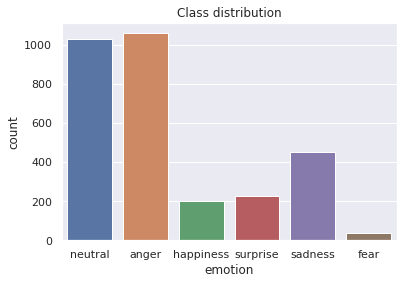

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# class imbalance plot
def class_imbalance_plot():
    print(df['emotion'].unique())
    sns.set_theme(style='darkgrid')
    sns.countplot(x = 'emotion', data = df)
    plt.title('Class distribution')
    plt.savefig(imgs_path + 'class_distribution.png')
    plt.show()
    return

class_imbalance_plot()

## waveform

In [3]:
import librosa.display

# waveplot
wavf, sr = librosa.load(df['path'][0])

plt.figure(figsize = (8, 4))
librosa.display.waveshow(wavf, sr = sr)
plt.title('Waveplot - male neutral')
plt.savefig(imgsPath + 'waveplot_male_neutral.png')
plt.show()

NameError: name 'data' is not defined

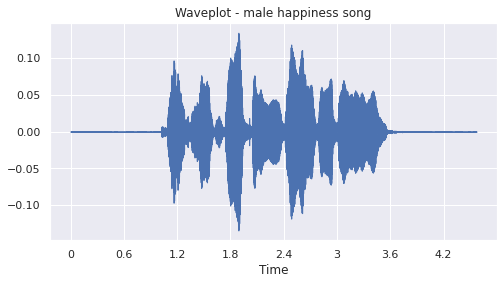

In [47]:
import librosa.display

# waveplot
wavf, sr = librosa.load(df['path'][2999])

plt.figure(figsize = (8, 4))
librosa.display.waveshow(wavf, sr = sr)
plt.title('Waveplot - female neutral')
plt.savefig(imgsPath + 'waveplot_female_neutral.png')
plt.show()

## log-mel spectrogram

# Feature extraction

- [mfcc extraction info](https://www.researchgate.net/profile/Teddy-Gunawan/publication/353296706_Speech_Emotion_Recognition_Using_Feature_Fusion_of_TEO_and_MFCC_on_Multilingual_Databases/links/613ef96f4e1df2710631ca0a/Speech-Emotion-Recognition-Using-Feature-Fusion-of-TEO-and-MFCC-on-Multilingual-Databases.pdf)
- [librosa docs](https://librosa.org/doc/latest/index.html)

In [2]:
import librosa

# log-mel spectrogram into mfcc

logMelSpecVal = []

def parse_audio_file(pathToFile, _duration, sampleRate, _offset):
    # load file
    wavf, sample_rate = librosa.load(pathToFile, res_type="kaiser_fast", duration=_duration, sr=sampleRate, offset=_offset)
    
    # get mfcc features (coefficients = 13, filters = 32)
    mfcc = np.array([])
    mfcc = np.mean(librosa.feature.mfcc(y=wavf, sr=sample_rate, n_mfcc = 13), axis=0)
    
    return mfcc

mfccVal = []

for fpath in df['path']:
    mfcc = parse_audio_file(fpath, 4, 44100, 0.5)
    mfccVal.append(mfcc)
    
# merge emotions with features
df = pd.concat([df, pd.DataFrame(mfccVal)], axis=1)
    
# drop unnecessary column
df.drop(columns='path', inplace=True)

# fill na's
df = df.fillna(0)
df.head()

,emotion,0,1,2,3,4,5,6,7,8,...,335,336,337,338,339,340,341,342,343,344
0,happy,-48.413395,-48.075798,-47.574280,-47.451622,-48.135826,-48.706688,-48.955540,-48.112358,-46.947311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,calm,-66.689575,-66.082527,-66.983719,-64.977615,-62.615215,-62.309586,-62.451180,-60.948093,-59.981323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,happy,-48.638100,-48.638100,-48.638100,-48.638100,-48.638100,-48.638100,-48.638100,-48.076477,-47.975407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,surprised,-58.190613,-58.190613,-58.190613,-58.190613,-58.190613,-58.190613,-58.190613,-58.190613,-58.190613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,calm,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.376183,-65.081711,-61.741520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def data_split(df):
    # divide data into labels and features
    X = df.iloc[:, :].drop(columns=['emotion'])
    y = df['emotion']
    
    # stratified train, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(df)

print(X_train.head())
print(y_train.head())

            0          1          2          3          4          5    \
759  -65.591377 -65.540787 -65.591377 -65.591377 -65.505386 -64.501968   
343  -57.263977 -57.263977 -56.639229 -56.887520 -57.263977 -57.263977   
139  -41.861794 -41.680698 -41.918819 -42.079815 -41.785030 -41.377090   
120  -51.646004 -51.646004 -51.646004 -51.646004 -51.646004 -51.646004   
1048 -68.325424 -68.325424 -68.325424 -68.325424 -68.325424 -68.325424   

            6          7          8          9    ...        335        336  \
759  -61.365719 -62.756821 -65.424454 -65.591377  ...   0.000000   0.000000   
343  -57.263977 -57.263977 -57.263977 -56.851582  ...   0.000000   0.000000   
139  -40.835270 -41.420681 -40.971836 -41.009720  ... -34.532997 -30.199177   
120  -51.646004 -51.646004 -51.646004 -51.646004  ...   0.000000   0.000000   
1048 -68.325424 -68.325424 -68.325424 -68.325424  ...   0.000000   0.000000   

      337  338  339  340  341  342  343  344  
759   0.0  0.0  0.0  0.0  0.0  0.

# Data preprocessing

In [5]:
from keras.utils import to_categorical

def data_preprocessing(X_train, X_test, y_train, y_test):

    # normalization (z-score, values between -1 and 1)
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean)/std
    X_test = (X_test - mean)/std

    # turn data into arrays for keras
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    print(y_train.shape)
    print(y_test.shape)

    # label one hot encoding
    lb = LabelEncoder()
    y_train = to_categorical(lb.fit_transform(y_train))
    y_test = to_categorical(lb.fit_transform(y_test))

    print(y_test[0:3])

    print(lb.classes_)

    # data reshaping
    X_train = X_train[:,:,np.newaxis]
    X_test = X_test[:,:,np.newaxis]

    print(X_train.shape)
    
    return X_train, X_test, y_train, y_test, lb

X_train, X_test, y_train, y_test, lb = data_preprocessing(X_train, X_test, y_train, y_test)

2022-04-08 10:34:34.088318: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


(1961,)
(491,)
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
(1961, 345, 1)


# Model architecture

- [model architecture info](https://www.researchgate.net/profile/Gregor-Hofer-3/publication/335829168_Analysis_of_Deep_Learning_Architectures_for_Cross-Corpus_Speech_Emotion_Recognition/links/5e2f0a2f4585152d156d9f4f/Analysis-of-Deep-Learning-Architectures-for-Cross-Corpus-Speech-Emotion-Recognition.pdf)

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.regularizers import l2

def get_model():
    #BUILD 1D CNN LAYERS
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    return model

'''
# this simple model gives around 30% accuracy
def get_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    return model
'''


'''
# this model gives around 35% accuracy
def get_model():
    #BUILD 1D CNN LAYERS
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(96, kernel_size=15, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.MaxPooling1D(pool_size=3, strides=2))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv1D(256, kernel_size=5, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=3, strides=2))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    return model
'''

model = get_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 336, 64)           704       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 327, 128)          82048     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 40, 128)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 31, 128)           163968    
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 3, 128)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 128)          

# Model training and export


Epoch 00001: val_accuracy improved from -inf to 0.25051, saving model to ../models/ravdess/model_1_CNN
INFO:tensorflow:Assets written to: ../models/ravdess/model_1_CNN/assets

Epoch 00002: val_accuracy improved from 0.25051 to 0.28106, saving model to ../models/ravdess/model_1_CNN
INFO:tensorflow:Assets written to: ../models/ravdess/model_1_CNN/assets

Epoch 00003: val_accuracy improved from 0.28106 to 0.29124, saving model to ../models/ravdess/model_1_CNN
INFO:tensorflow:Assets written to: ../models/ravdess/model_1_CNN/assets

Epoch 00004: val_accuracy improved from 0.29124 to 0.34216, saving model to ../models/ravdess/model_1_CNN
INFO:tensorflow:Assets written to: ../models/ravdess/model_1_CNN/assets

Epoch 00005: val_accuracy did not improve from 0.34216

Epoch 00006: val_accuracy improved from 0.34216 to 0.36253, saving model to ../models/ravdess/model_1_CNN
INFO:tensorflow:Assets written to: ../models/ravdess/model_1_CNN/assets

Epoch 00007: val_accuracy improved from 0.36253 to 

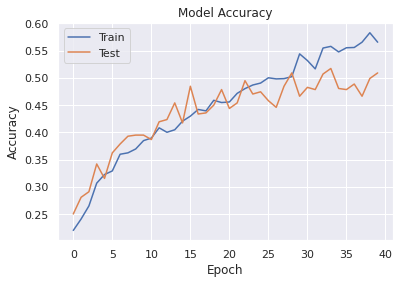

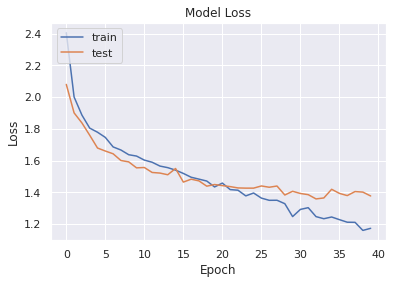

In [38]:
from keras.callbacks import ModelCheckpoint

# use checkpoints to save best model
checkpoint = ModelCheckpoint(modelsPath + 'model_1_CNN', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# fit model
model_history = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test), callbacks=[checkpoint], verbose=0)

# plot model accuracy and loss over epochs
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(imgsPath + 'Initial_Model_Accuracy.png')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(imgsPath + 'Initial_Model_loss.png')
plt.show()

# Results

## accuracy and loss

In [39]:
# loss and accuracy percentage on test set
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

16/16 [==============================] - 0s 3ms/step - loss: 1.3767 - accuracy: 0.5092
Loss of the model is -  1.3766649961471558
16/16 [==============================] - 0s 3ms/step - loss: 1.3767 - accuracy: 0.5092
Accuracy of the model is -  50.91649889945984 %


In [40]:
# predictions
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# combine both
finaldf = actual.join(predictions)
finaldf[1:10]

,Actual Values,Predicted Values
1,sad,sad
2,calm,angry
3,neutral,calm
4,angry,angry
5,calm,calm
6,sad,calm
7,angry,angry
8,calm,calm
9,disgust,disgust


## confusion matrix

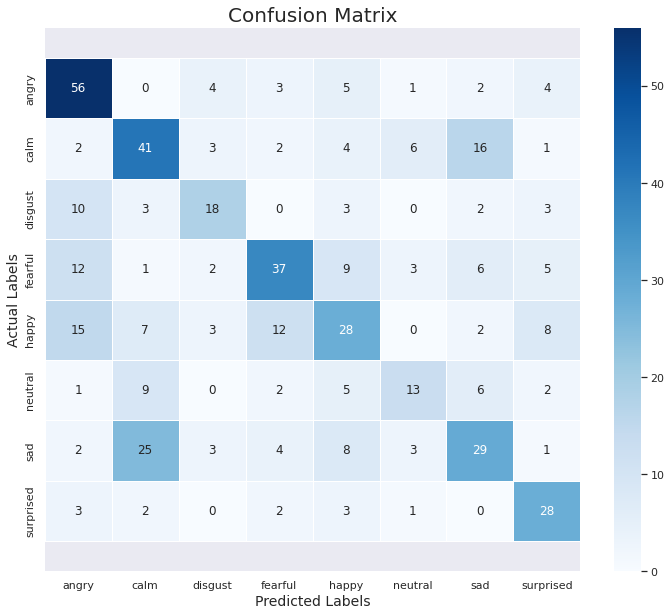

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix, actual vs predicted
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig(imgsPath + 'Initial_Model_Confusion_Matrix.png')
plt.show()

In [42]:
print(classification_report(actual, predictions, target_names = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']))

              precision    recall  f1-score   support

       angry       0.55      0.75      0.64        75
        calm       0.47      0.55      0.50        75
     disgust       0.55      0.46      0.50        39
     fearful       0.60      0.49      0.54        75
       happy       0.43      0.37      0.40        75
     neutral       0.48      0.34      0.40        38
         sad       0.46      0.39      0.42        75
   surprised       0.54      0.72      0.62        39

    accuracy                           0.51       491
   macro avg       0.51      0.51      0.50       491
weighted avg       0.51      0.51      0.50       491

